#### Project 07

# Introduction to Machine Learning

Joanna Farris  
10-08-2024  

---    

#### For this final project, we explore the world of machine learning by focusing on supervised learning, specifically simple linear regression. We'll train a model using all available data, then use the resulting 'best-fit' line to make predictions.

GitHub repository: https://github.com/Pojetta/datafun-07-applied  

----

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

## Part 1 - Chart a Straight Line

### Understanding Linear Relationships

To demonstrate a linear relationship, we'll use the following equation to convert temperature from Fahrenheit to Celsius:

`c = (5/9) * (f - 32)`

Where `c` represents Celsius and `f` represents Fahrenheit. By substituting any value for `f`, you can solve for the corresponding value of `c`.

This equation shows that for every `f`, there is a corresponding `c`, and these pairs `(f, c)` can be graphed along a continuous line. Each unique value of `f` produces a unique value of `c`, and these pairs will always fall on that line.

### Plotting a Straight Line 

#### Temperature Conversion Function  

Now, we'll create a function using a lambda expression for our conversion equation, and we'll store this function in our `c` variable.  


In [31]:
# Create a lambda function that calculates the Celsius equivalents of Fahrenheit temperatures.
c = lambda f: 5 / 9 * (f - 32)

Next, we’ll call our new `c()` function to convert our Fahrenhait values to their corresponding Celsius values, and we'll generate a list of tuples containing these value pairs.

In [32]:
# Creates a list of tuples containing Fahrenheit temperatures (f) and their corresponding Celsius values (c(f)) from 0 to 100 in increments of 10.
temps = [(f, c(f)) for f in range(0, 101, 10)]

* ###### Note: The tuple call uses the conventional function notation c(f), pronounced "c of f", where previously we saw the variable (c). While the calculated value remains the same--the value of (c) == the value of c(f)--the notation c(f) in the pair (f, c(f)) emphasizes that the variable (c) is now a function of f, indicating that c depends on f. 

  ###### Essentially, `c` is a calculated value; `c(f)` is the thing that does the calculating.


##### Finally, we'll place the data in a dataframe using Pandas, then use it's plot method to display the Fahrenheit and Celsius temperatures as a graph. 

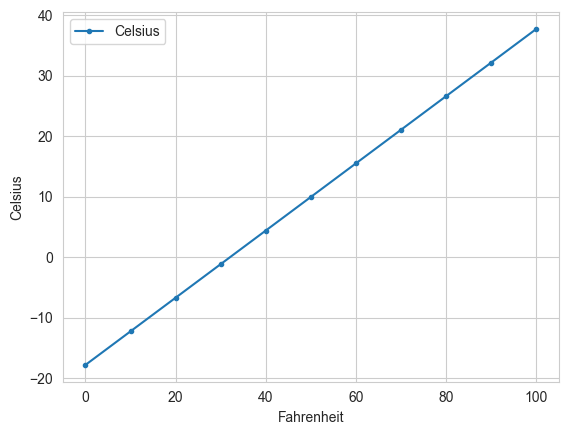

In [33]:
# Create a pandas dataframe from the list of tuples.
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
# Use pandas plot method to create a graph (a straight line) from the data (the )
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')

In the equation `y = mx + b`:
- `y` represents Celsius
- `x` represents Fahrenheit
- `m` is the slope
- `b` is the value of `y` when `x = 0` (i.e., the Celsius value when Fahrenheit is 0)

You can calculate the slope of the line using any two points on the graph, and you can find `b` by solving for `c` when Fahrenheit is 0.

c = (5/9) * (f - 32)

-----

# Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [34]:
# Load the data into a dataframe
nyc_df = pd.read_csv('nyc.csv')

### Section 2 - Data Inspection

In [35]:
# Display the head
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [36]:
# Display the tail
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [37]:
# Rename the "Value" column "Temperature"
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [38]:
# Check the head again to see the column name change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [39]:
# Check the datatype of the Date column
nyc_df.Date.dtype


dtype('int64')

In [40]:
# Call the Series method floordiv to divide by 100 and truncate the last two digits.
nyc_df.Date = nyc_df.Date.floordiv(100)

In [41]:
# Check the head again to verify this change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [42]:
# Calcuate basic statistics from Temperature column with describe()
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [43]:
# Use the linregress() function from scipy's stats module to calculate the slope and intercept for a given set of points
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [44]:
# To get the slope
linear_regression.slope

np.float64(0.014771361132966163)

In [45]:
# To get the intercept 
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Prediction

To predict the average January high temperature, use the previously calculated slope and intercept values to write a linear equation in the form `y = mx +b`, where:  

- `y` represents Celsius (the output; the dependent variable)  

- `x` represents Fahrenheit (the input; the independent variable)  

- `m` is the slope (the value returned by linear_regression.slope)  

- `b` is the `y` intercept when `x = 0` (the value returned by linear_regression.intercept)  


##### * * * * **The  resulting  equation  *IS*  your  model.** * * * *   

`y = linear_regression.slope * (x) + linear_regression.intercept`


Now you can use this model to predict the average January high temperature for any given year by passing in the year as the `x` variable, and solving for y.


In [46]:
# Use your model to predict the average high temp for January 2024
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

In [47]:
# Use your model to approximate what the average temp was in 1890
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

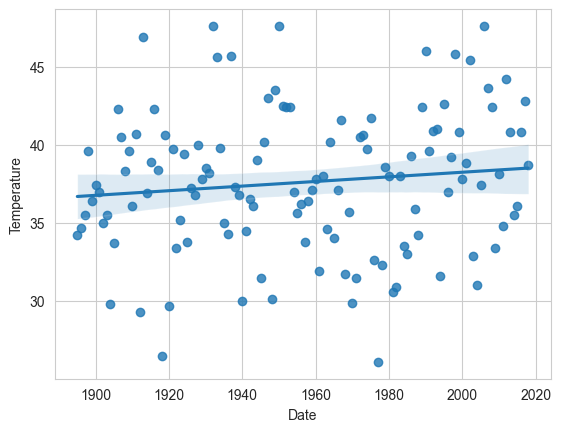

In [48]:
# Plot the average high temperature and a regression line.
 
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

(10.0, 70.0)

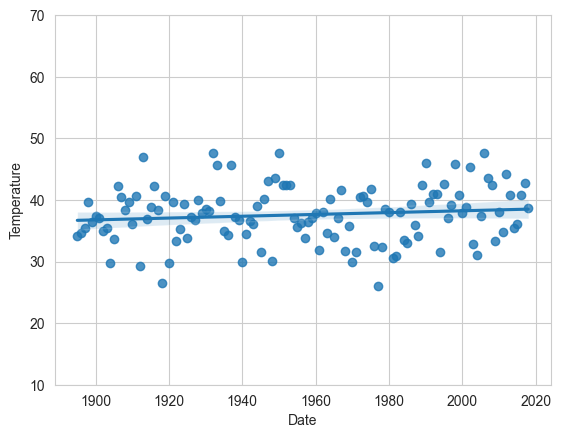

In [49]:
# Scale the y axis for a better data visualizaion.

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

----

# Part 3 - Predict Avg High Temp in NYC in January (2nd method)

### Section 1 - Build and Train the Model:

In [50]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

In [51]:
# Check the shape of the model.
X_train.shape

(93, 1)

In [52]:
X_test.shape

(31, 1)

In [53]:
# Create an instance of LinearRegression
linear_regression = LinearRegression()

# Fit (train) the model
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [54]:
# Optionally print specific attributes
print("Coefficients:", linear_regression.coef_)
print("Intercept:", linear_regression.intercept_)

Coefficients: [0.01939167]
Intercept: -0.30779820252656265


### Section 2 - Test the Model

In [55]:
# Use the fitted model to make predictions on the remaining dataset
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [56]:
# Define a lambda function to compute predicted values based on the linear regression equation
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [57]:
# Predict 2024
predict(2024)

array([38.94094855])

In [58]:
#Approximate 1890
predict(1890)

array([36.34246432])

### Section 4 - Visualizations

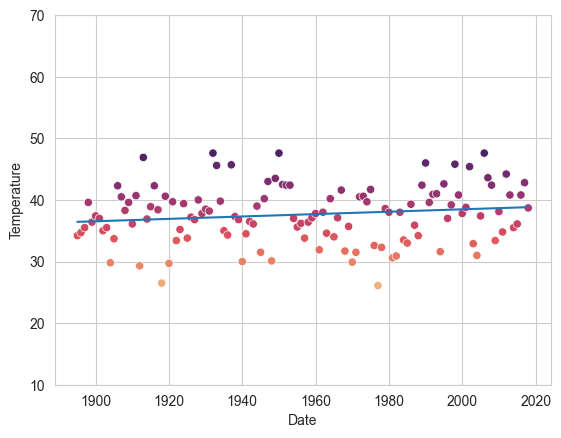

In [59]:
# Create a scatterplot of the dataset using seaborn's scatterplot function and Matplotlib's plot function.

axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='flare', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

line = plt.plot(x, y)

----

## My Insights

Throughout this project, I explored both a traditional Simple Linear Regression (SLR) model and a Machine Learning (ML) linear regression model to predict temperature trends over a 125-year period. These are my key takeaways:


* One thing that stood out to me is that the SLR model, by design, uses the entire dataset for building the model (so *more* data), whereas the ML model only trains on a portion of the data.  

* Knowing absolutely nothing coming into this, I was surprised to learn that despite the differences in how they handle the data, the produced models are of the exact same form: the familiar slope-intercept linear equation, y = mx + b.  

* The key difference between the two models is in the way that we feed them data. Specifically, instead of recieving the entire dataset (like with the SLR model), the Machine Learning model is only given a majority of it, as it reserves a portion for testing. And its value must lie in the feedback from those tests--as it surely allows for an ever greater fine tuning of the model’s ability to predict. 

 
In comparing SLR and ML models, I found it fascinating how each model utilizes data differently. While both ultimately follow the same equation structure, the iterative training and testing process in ML opens the door for refining predictions and potentially improving model accuracy. 